In [1]:
import numpy as np
import pandas as pd

#### Read the provided phone book csv file.

In [2]:
fileName = "phone_book.csv"
data_csv = pd.read_csv(fileName,sep=",", usecols = ['SURNAME','FORENAME', 'TITLE', 'PHONE', 'EMAIL'])

#### Create a colored pie chart to show the distribution of the 5 most abundant titles.

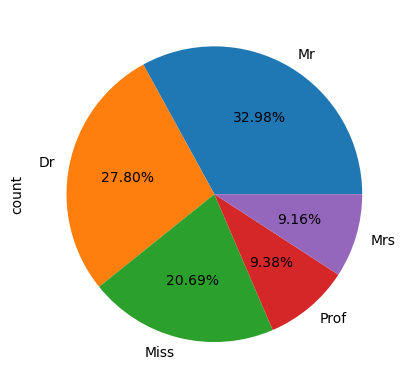

In [3]:
tmp = data_csv.groupby(['TITLE'])['TITLE'].value_counts()
top5 = tmp.nlargest(5).plot.pie(autopct = "%.2f%%")

#### Adjust your code to combine these Mrs. and Miss in your plot as a single group.

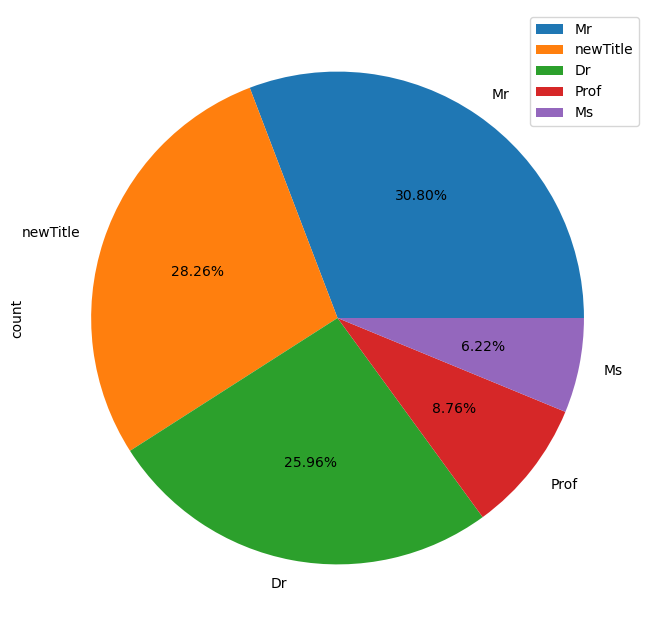

In [4]:
countMergeTitle = 0
mergeTitle = tmp.to_frame()

for index, row in mergeTitle.iterrows():
    if index.lower() == 'miss' or index.lower()=='mrs': 
        countMergeTitle+= row['count']
        mergeTitle = mergeTitle.drop(index)

mergeTitle.loc['newTitle'] = [countMergeTitle]
#print(mergeTitle)

mergedChart = mergeTitle.nlargest(5, 'count').plot.pie(y='count', figsize=(8,8), autopct = "%.2f%%")


#### Create a colored pie chart to show the distribution of the 5 most abundant first names per title

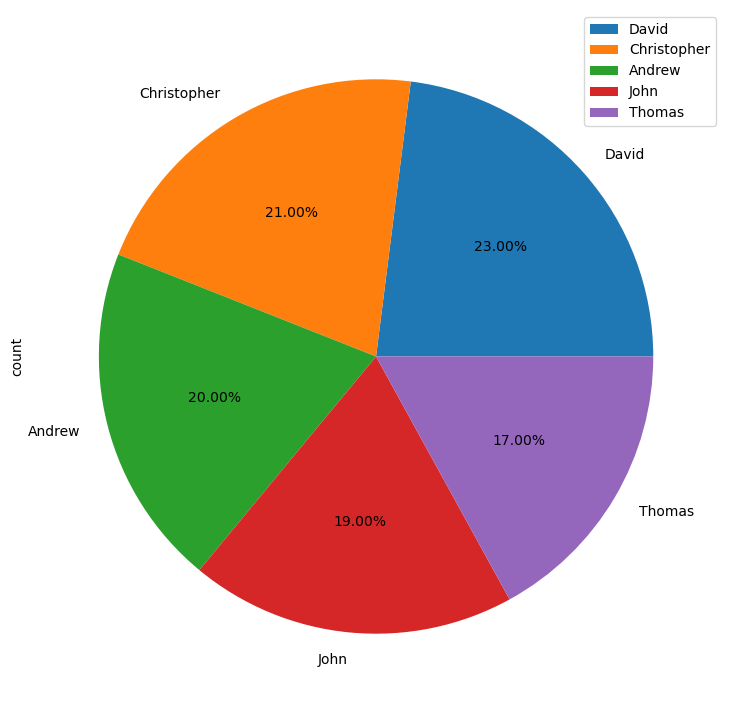

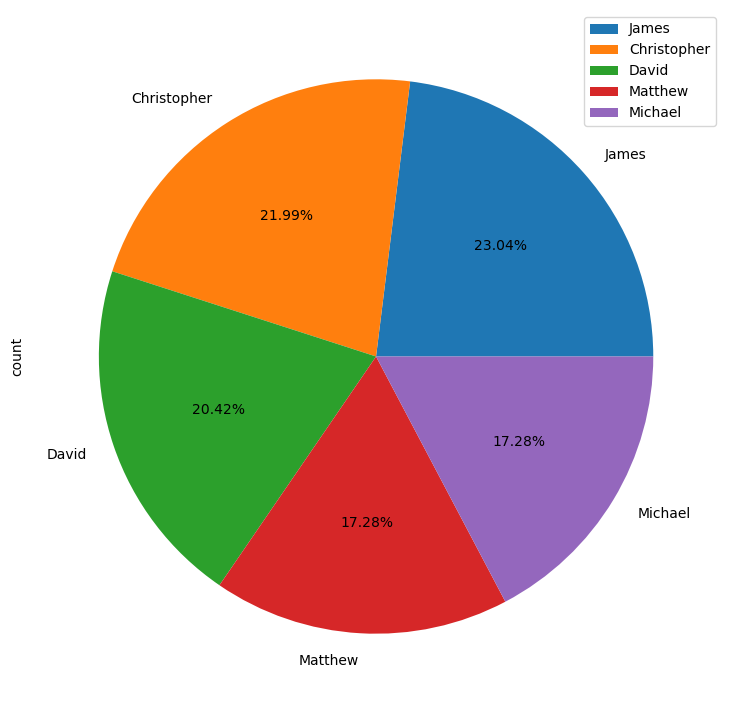

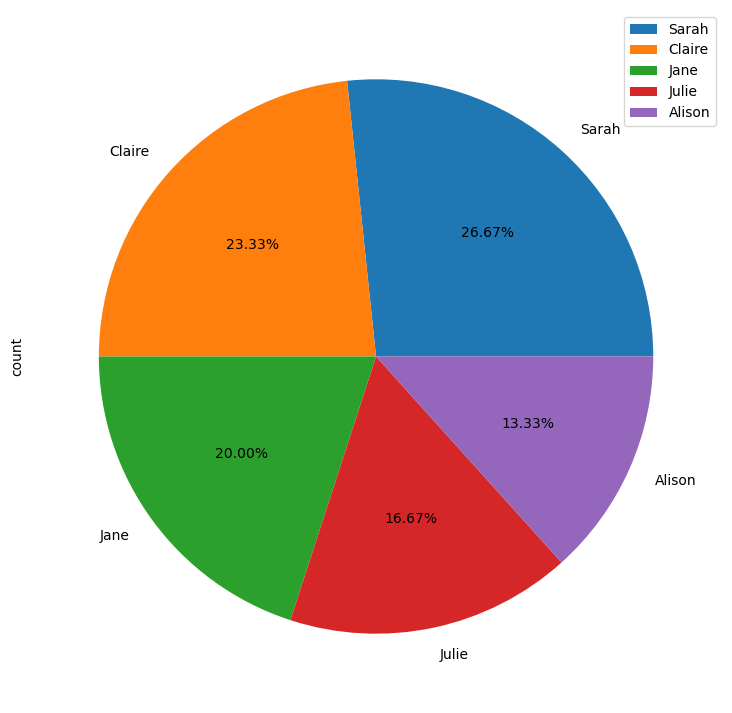

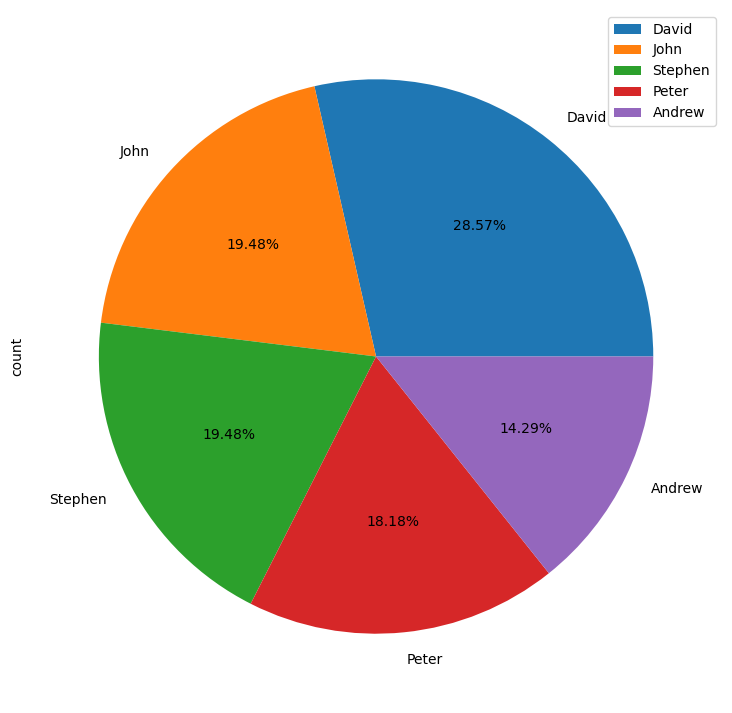

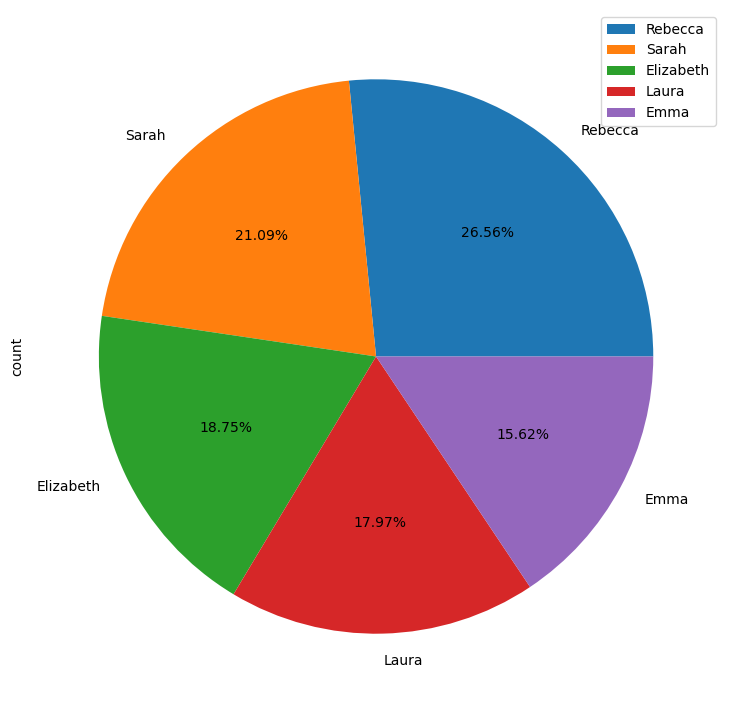

In [5]:
distribution = data_csv.copy()
distribution['FORENAME'] = distribution['FORENAME'].str.split(expand=True)[0]

#change the title mrs and miss to 'newTitle'
for index, row in distribution.iterrows():
    if row['TITLE'].lower() == 'miss' or row['TITLE'].lower()=='mrs': 
        distribution.loc[index, 'TITLE'] = 'newTitle'

#Group by Title and Forename
forenameGrouping = distribution.groupby(['TITLE','FORENAME'])['TITLE'].value_counts()
forenameGrouping = forenameGrouping.to_frame()

#loop to create pie chart
top5Title = mergeTitle.nlargest(5, 'count')
#print(top5Title.index)
for (indexTitle, indexForename), row in forenameGrouping.iterrows():
    if indexTitle in top5Title.index:
        forenameGrouping.xs(indexTitle, level=('TITLE')).nlargest(5,'count').plot.pie(y='count', autopct = "%.2f%%", figsize=(9,9))
        #print('\nrow:', forenameGrouping.xs(indexTitle, level=('TITLE')).nlargest(5,'count'))
        top5Title = top5Title.drop(indexTitle)

#### Compute the average length of surnames per title

In [6]:
#count the length of each surname
data_csv['SurnameLen'] = data_csv['SURNAME'].str.len()
data_csv.groupby(['TITLE'])['SurnameLen'].mean()

TITLE
           8.461538
Baron     29.000000
Capt       6.000000
Doctor     7.333333
Dr         6.875974
Em Fel     8.000000
Em Pro     6.343750
Lic       16.000000
MISS       6.454545
MR         6.777778
MRS       14.500000
MS         9.500000
MS.        4.000000
Miss       6.706667
Mr         6.864994
Mr.        7.500000
Mrs        6.744086
Ms         6.970414
Prof       6.378151
Prosir     8.000000
Radm       7.000000
Sr        11.000000
miss       6.200000
mr         5.000000
mrs        7.000000
Name: SurnameLen, dtype: float64